data = 
   Size  Bedrooms   Price
0  2104         3  399900
1  1600         3  329900
2  2400         3  369000
3  1416         2  232000
4  3000         4  539900
5  1985         4  299900
6  1534         3  314900
7  1427         3  198999
8  1380         3  212000
9  1494         3  242500
data.describe = 
              Size   Bedrooms          Price
count    47.000000  47.000000      47.000000
mean   2000.680851   3.170213  340412.659574
std     794.702354   0.760982  125039.899586
min     852.000000   1.000000  169900.000000
25%    1432.000000   3.000000  249900.000000
50%    1888.000000   3.000000  299900.000000
75%    2269.000000   4.000000  384450.000000
max    4478.000000   5.000000  699900.000000
data after normalization = 
       Size  Bedrooms     Price
0  0.130010 -0.223675  0.475747
1 -0.504190 -0.223675 -0.084074
2  0.502476 -0.223675  0.228626
3 -0.735723 -1.537767 -0.867025
4  1.257476  1.090417  1.595389
5 -0.019732  1.090417 -0.323998
6 -0.587240 -0.223675 -0.204036


Text(0.5, 1.0, 'Error vs. Training Epoch')

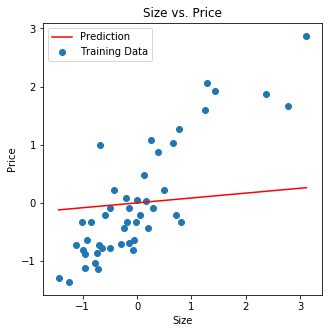

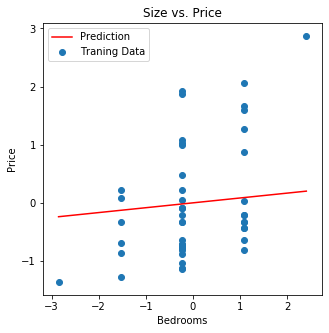

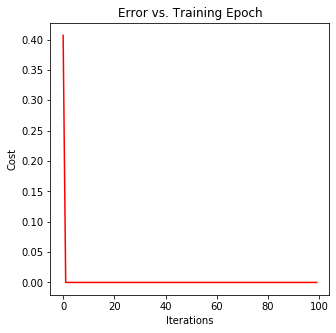

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
def computeCost(X, y, theta):
    inner = np.power(((X * theta.T) - y), 2)
    return np.sum(inner) / (2 * len(X)) 

def gradientDescent(X, y, theta, alpha, iters):
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)

    for i in range(iters):
        error = (X * theta.T) - y

        for j in range(parameters):
            term = np.multiply(error, X[:,j])
            temp[0,j] = theta[0,j] - ((alpha / len(X)) * np.sum(term)) # 3 thetas

        theta = temp
        cost[i] = computeCost(X, y, theta)

        return theta, cost
#=============================================================
 #read data
path2 = "data2.txt"
data2 = pd.read_csv(path2, header=None, names=['Size', 'Bedrooms', 'Price'])
#show data
print('data = ')
print(data2.head(10))

print('data.describe = ')
print(data2.describe())
 #rescaling data
    #mmkn / range from 0 to 1

data2 = (data2 - data2.mean())/data2.std() 

print('data after normalization = ')
print(data2.head(10) )
#add ones column 
data2.insert(0, 'Ones', 1)
 #separate X (training data) from y (target variable)
cols = data2.shape[1]
X2 = data2.iloc[:,0:cols-1]
y2 = data2.iloc[:,cols-1:cols]

print('X2 data = \n' ,X2.head(10) )
print('y2 data = \n' ,y2.head(10) )

#convert to matrices and initialize theta 
X2 = np.matrix(X2.values)
y2 = np.matrix(y2.values)
theta2 = np.matrix(np.array([0,0,0]))
print('X2 \n',X2)
print('X2.shape = ' , X2.shape)

print('theta2 \n',theta2)
print('theta2.shape = ' , theta2.shape)

print('y2 \n',y2)
print('y2.shape = ' , y2.shape)

#initialize variables for learning rate and iterations 
alpha = 0.1
iters = 100
#perform linear regression on the data set 
g2, cost2 = gradientDescent(X2, y2, theta2, alpha, iters)
 #get the cost (error) of the model
thiscost = computeCost(X2, y2, g2)
print('g2 = ' , g2)
print('cost2 = ' , cost2[0:50] )
print('computeCost = ' , thiscost)
#get best fit line for Size vs. Price 
x = np.linspace(data2.Size.min(), data2.Size.max(), 100)
print('x \n',x)
print('g \n',g2)
f = g2[0, 0] + (g2[0, 1] * x)
print('f \n',f)

#draw the line for Size vs. Price 
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data2.Size, data2.Price, label='Training Data')
ax.legend(loc=2)
ax.set_xlabel('Size')
ax.set_ylabel('Price')
ax.set_title('Size vs. Price')
#get best fit line for Bedrooms vs. Price 
x = np.linspace(data2.Bedrooms.min(), data2.Bedrooms.max(), 100)
print('x \n',x)
print('g \n',g2)
f = g2[0, 0] + (g2[0, 1] * x)
print('f \n',f)
#draw the line for Bedrooms vs. Price 
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data2.Bedrooms, data2.Price, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Bedrooms')
ax.set_ylabel('Price')
ax.set_title('Size vs. Price')
 #draw error graph
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(np.arange(iters), cost2, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')


In [20]:
print("m")

m
